In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/home/beans/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:965: FutureWarning: This class has been deprecated. Please use ImageCompression
  warnings.warn(


In [2]:
get_obs_per_sec()

(214.33347, 13.169494)

In [3]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([17.066305, 22.822868, 17.552141, 21.573542, 18.726583, 18.375746,
       16.394749, 16.725256, 17.99011 , 13.169494, 19.517696, 14.418953],
      dtype=float32)

In [4]:
set_should_stop(True)

In [5]:
dataloader = BlenderDataloader("trn", 6)

In [6]:
dataloader.get_obs_per_second()

(214.33347, 13.169494)

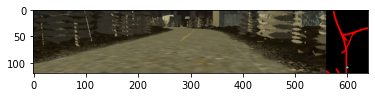

In [7]:
ix = 4
plt.imshow(dataloader.img_chunk[ix][0])

(array([ 38.,  37.,  59., 210., 199., 137., 116., 126., 192., 278.]),
 array([10.919341, 17.604992, 24.290642, 30.976292, 37.66194 , 44.34759 ,
        51.03324 , 57.71889 , 64.40454 , 71.09019 , 77.77584 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

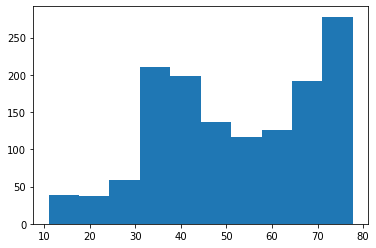

In [8]:
plt.hist(dataloader.aux_chunk[:,:,2].flatten())

(array([ 38.,  77., 329., 431., 253., 131.,  34.,  39.,  28.,  32.]),
 array([-0.15473309, -0.11129873, -0.06786436, -0.02442999,  0.01900437,
         0.06243874,  0.10587311,  0.14930747,  0.19274184,  0.23617621,
         0.27961057], dtype=float32),
 <BarContainer object of 10 artists>)

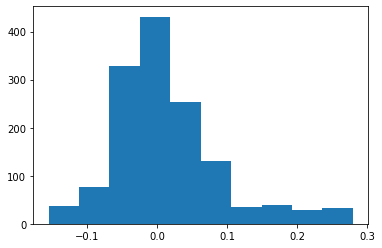

In [9]:
plt.hist(dataloader.targets_chunk[:,:,14].flatten())

In [10]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(
    img, 
    aux_model,
    aux_calib,
    wp_angles,
    wp_headings,
    wp_curvatures,
    aux_targets,
    to_pred_mask,
) = batch

is_first_in_seq

CPU times: user 0 ns, sys: 809 µs, total: 809 µs
Wall time: 767 µs


True

In [11]:
wp_angles.shape, wp_headings.shape, wp_curvatures.shape

(torch.Size([6, 9, 30]), torch.Size([6, 9, 30]), torch.Size([6, 9, 30]))

In [13]:
aux_model.shape, aux_calib.shape, aux_targets.shape

(torch.Size([6, 9, 5]), torch.Size([6, 9, 4]), torch.Size([6, 9, 12]))

(array([ 27., 149.,  47.,  30., 549., 372., 344.,  57.,  18.,  27.]),
 array([-4.26  , -3.387 , -2.512 , -1.638 , -0.763 ,  0.1113,  0.986 ,
         1.86  ,  2.734 ,  3.61  ,  4.484 ], dtype=float16),
 <BarContainer object of 10 artists>)

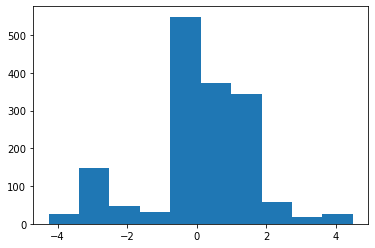

In [14]:
plt.hist((wp_angles*to_pred_mask).flatten().detach().cpu().numpy())

(array([192.,  47.,  23.,  21., 860.,  50., 356.,  19.,  16.,  36.]),
 array([-3.854 , -2.988 , -2.123 , -1.259 , -0.3933,  0.4717,  1.337 ,
         2.201 ,  3.066 ,  3.932 ,  4.797 ], dtype=float16),
 <BarContainer object of 10 artists>)

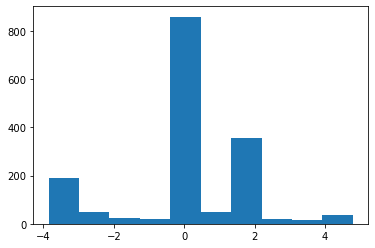

In [15]:
plt.hist((wp_headings*to_pred_mask).flatten().detach().cpu().numpy())

(array([122.,  28.,  25., 115., 772., 139., 352.,  58.,   1.,   8.]),
 array([-1.069  , -0.841  , -0.613  , -0.3843 , -0.156  ,  0.07227,
         0.3005 ,  0.529  ,  0.7573 ,  0.9854 ,  1.214  ], dtype=float16),
 <BarContainer object of 10 artists>)

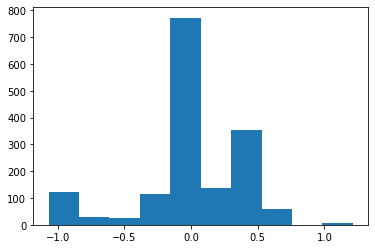

In [16]:
plt.hist((wp_curvatures*to_pred_mask).flatten().detach().cpu().numpy())

In [17]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.8442, device='cuda:0', dtype=torch.float16)

In [18]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

NameError: name 'aux' is not defined

In [17]:
abs(t).max()

tensor(12240.8799, device='cuda:0')

(array([10., 19., 12.,  1.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([   2.3530273,  102.832375 ,  203.31172  ,  303.79108  ,
         404.27042  ,  504.74976  ,  605.2291   ,  705.70844  ,
         806.1878   ,  906.6671   , 1007.1465   ], dtype=float32),
 <BarContainer object of 10 artists>)

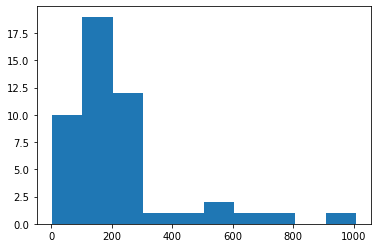

In [18]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [19]:
abs(td).max()

tensor(1007.1465, device='cuda:0')

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)